# Case Study on Probability for Data Science

Problem Statement: 
To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [58]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
data=pd.read_csv('mushrooms.csv')

In [60]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [61]:
data.shape

(8124, 23)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [63]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [64]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [65]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [66]:
#performing label encoding
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df = data.apply(label.fit_transform)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [67]:
#Spliting the data into train and test 
from sklearn.model_selection import train_test_split
x = df.drop('class',axis=1)
y = df['class']
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.25,random_state=0)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

# LogisticRegression

In [69]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

ACCURACY of the model:  0.9502708025603152
F - score of the model:  0.9501349749922515


# DecisionTree

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
print('Accuracy on Decision tree model is',accuracy_score(y_test,y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

Accuracy on Decision tree model is 1.0
F - score of the model:  1.0


# RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100,random_state=0,criterion='entropy')
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
#print(confusion_matrix(y_test,y_pred))
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

ACCURACY of the model:  1.0
F - score of the model:  1.0


# SVM

In [75]:
from sklearn.svm import SVC

Linear svm

In [76]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)
print('Accuracy using linear svm is', accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

Accuracy using linear svm is 0.9714426390940424
F - score of the model:  0.9713409174954748


Polynomial svm

In [77]:
svm_pol = SVC(kernel='poly')
svm_pol.fit(x_train,y_train)
y_pred = svm_pol.predict(x_test)
print('Accuracy using poly svm is', accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

Accuracy using poly svm is 0.9975381585425899
F - score of the model:  0.9975326459729648


Radial svm

In [78]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred = svm_radial.predict(x_test)
print('Accuracy using radial svm is', accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

Accuracy using radial svm is 0.9906450024618415
F - score of the model:  0.9906194507411166


# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values


[0.9985228951255539,
 0.9980305268340719,
 0.9970457902511078,
 0.9970457902511078,
 0.9965534219596258,
 0.9965534219596258,
 0.9960610536681438,
 0.9950763170851797,
 0.9960610536681438,
 0.9940915805022157,
 0.9945839487936977,
 0.9926144756277696]

Text(0, 0.5, 'accuracy')

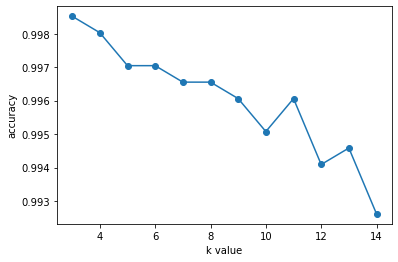

In [80]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [81]:
classifier = KNeighborsClassifier(n_neighbors=2,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

ACCURACY of the model:  0.999507631708518
F - score of the model:  0.9995066629648172


# NaiveBayes

gaussian naive bayes

In [82]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

ACCURACY of the model:  0.914327917282127
F - score of the model:  0.9142109310820967


Bernoulli naive bayes

In [83]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

ACCURACY of the model:  0.8404726735598228
F - score of the model:  0.836540697154508


from this,decision tree and random forest classifiers give the best results.